# Data Wrangling

# Table of contents
* [Overview](#Overview)
* [1. Imports](#1.-Imports)
* [2. Check the size of excel files](#2.-Check-the-size-of-excel-files)
* [3. Find missing value](#3.-Find-missing-value)
* [4. Deleting Features](#4.-Deleting-Features)
* [5. Check datatype](#5.-Check-datatype)
* [6. Convert Datatype](#6.-Convert-Datatype)
* [7. Review Distribution](#7.-Review-Distribution)
* [8. Check Outliers](#8.-Check-Outliers)
* [9. Save Data](#9.-Save-data)

## Overview
In this notebook, I am going to read excel dataset: 'Telco_customer_churn.xlsx'. With this dataset, I will find missing values, review distribution, and check datatype to see whether it's properly defined or not.

Relevant website:
https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113

## 1. Imports

In [10]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [11]:
# load excel
data = pd.read_excel("/Users/hansangjun/Desktop/Springboard/Capstone2/data/telco_data/Telco_customer_churn.xlsx")

## 2. Check the size of excel files

In [12]:
print(data.shape)

(7043, 33)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Original dataset has 7043 observations with 33 columns composed of 3 float, 6 int, and 24 object.

## 3. Find missing value


In [6]:
# Count the missing values
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

,count,%
Churn Reason,5174,73.463013
Online Security,0,0.000000
CLTV,0,0.000000
Churn Score,0,0.000000
Churn Value,0,0.000000
Churn Label,0,0.000000
Total Charges,0,0.000000
Monthly Charges,0,0.000000
Payment Method,0,0.000000
Paperless Billing,0,0.000000


'Churn Reason' has over 5000 missing values. Let's check what's inside.

In [7]:
data['Churn Reason'].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: Churn Reason, 

In [8]:
data['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

It looks like only churned observation has 'Churn Reason'. When we create a prediction model, we have to delete this variable because overfitting could occur. However, this variable might help when I try EDA. This feature might give me some insights. Therefore, I will keep this variable for now. 

In [4]:
# del data['Churn Reason']

## 4. Deleting Features

If the feature with object datatype has too many values or only one value, we have to take it out.

In [3]:
data = data.drop(columns=['CustomerID','Count', 'Lat Long', 'Country', 'State', 'Churn Value'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   object 
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

## 5. Check datatype

### 5-1 Object

In [11]:
data.select_dtypes('object').T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
City,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,...,Twentynine Palms,Twentynine Palms,Westmorland,Winterhaven,Yucca Valley,Landers,Adelanto,Amboy,Angelus Oaks,Apple Valley
Gender,Male,Female,Female,Female,Male,Female,Male,Male,Male,Male,...,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male
Senior Citizen,No,No,No,No,No,No,Yes,No,No,No,...,No,Yes,No,No,No,No,No,No,No,No
Partner,No,No,No,Yes,No,Yes,No,No,Yes,Yes,...,No,Yes,No,No,No,No,Yes,Yes,Yes,No
Dependents,No,Yes,Yes,Yes,Yes,No,No,No,Yes,No,...,No,No,No,No,No,No,Yes,Yes,Yes,No
Phone Service,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,...,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes
Multiple Lines,No,No,Yes,Yes,Yes,No,No phone service,No,Yes,No phone service,...,No,Yes,No,No,No phone service,No,Yes,Yes,No phone service,No
Internet Service,DSL,Fiber optic,Fiber optic,Fiber optic,Fiber optic,DSL,DSL,No,Fiber optic,DSL,...,No,DSL,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic
Online Security,Yes,No,No,No,No,No,No,No internet service,No,No,...,No internet service,Yes,No,No,No,No internet service,Yes,No,Yes,Yes
Online Backup,Yes,No,No,No,Yes,No,No,No internet service,Yes,Yes,...,No internet service,Yes,No,No,Yes,No internet service,No,Yes,No,No


It seems column 'Total Charges' has to be float type. 

### 5-2 float and int

In [12]:
data.select_dtypes('float').T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
Monthly Charges,53.85,70.7,99.65,104.8,103.7,55.2,39.65,20.15,99.35,30.2,...,20.05,60.0,69.5,78.7,60.65,21.15,84.8,103.2,29.6,105.65


In [13]:
data.select_dtypes('int').T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
Zip Code,90003,90005,90006,90010,90015,90020,90022,90024,90028,90029,...,92277,92278,92281,92283,92284,92285,92301,92304,92305,92308
Tenure Months,2,2,8,28,49,10,1,1,47,1,...,2,55,38,19,12,72,24,72,11,66
Churn Score,86,67,86,84,89,78,100,92,77,97,...,80,71,35,20,24,45,59,71,59,38
CLTV,3239,2701,5372,5003,5340,5925,5433,4832,5789,2915,...,5191,4212,4591,2464,3740,5306,2140,5560,2793,5097


Zip Code has to be object type.

## 6. Convert Datatype

### 6-1. Count values of 'Total Charges'

In [14]:
data['Total Charges'].value_counts()

20.2      11
          11
19.75      9
19.65      8
20.05      8
          ..
444.75     1
5459.2     1
295.95     1
394.1      1
6844.5     1
Name: Total Charges, Length: 6531, dtype: int64

When I run the value counts of 'Total Charges', it gives me 11 " " values. These values has to be 0 before we convert to float.

### 6-2. Replace white space to 0

In [5]:
data['Total Charges'] = data['Total Charges'].replace(" ", 0)
data['Total Charges'].value_counts()

20.20      11
0.00       11
19.75       9
19.65       8
20.05       8
           ..
444.75      1
5459.20     1
295.95      1
394.10      1
6844.50     1
Name: Total Charges, Length: 6531, dtype: int64

Empty spaces have been removed and replaced to 0.00.

### 6.3 Convert datatype

In [6]:
data['Total Charges'] = data['Total Charges'].astype(float)

In [7]:
data['Zip Code'] = data['Zip Code'].astype(object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   object 
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   object 
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

Column 'Total Charges' is a float, and 'Zip Code' is an object.

## 7. Review Distribution

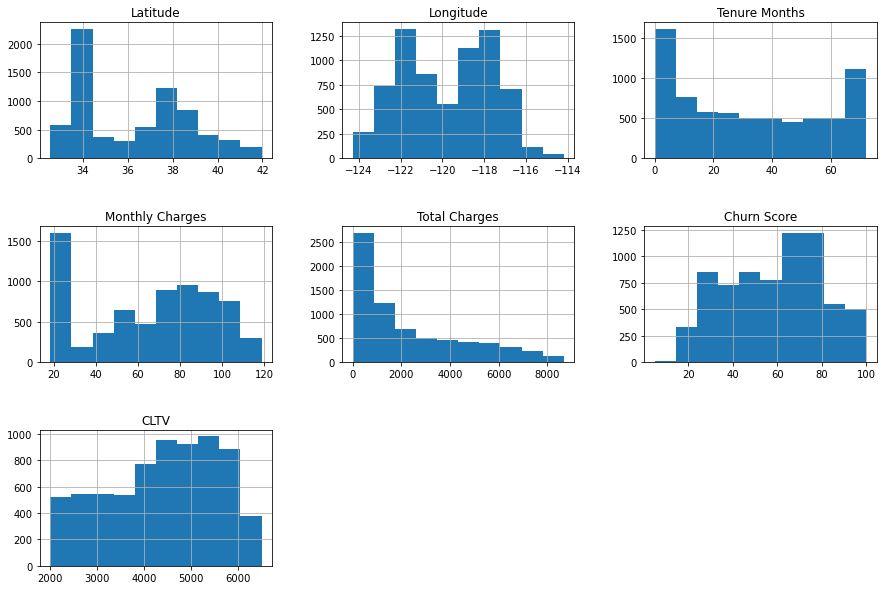

In [11]:
# Review Distribution
data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Ignore the longitude and latitude.

## 8. Check Outliers

### 8-1. Create function to check min and max value of continuous variables.

In [20]:
import numpy as np
# filter float and num
data_float = data.select_dtypes(include=[float])
data_int = data.select_dtypes(include=[int])

# find min max for all columns
def minMax(x):
    return pd.Series(index=['min','max', 'std'],data=[x.min(),x.max(),x.std()])


In [21]:
# min and max of float
data_float.apply(minMax)

,Monthly Charges,Total Charges
min,18.250000,0.00000
max,118.750000,8684.80000
std,30.090047,2266.79447


In [22]:
# min and max of int
data_int.apply(minMax)

,Tenure Months,Churn Score,CLTV
min,0.000000,5.000000,2003.000000
max,72.000000,100.000000,6500.000000
std,24.559481,21.525131,1183.057152


<AxesSubplot:xlabel='Tenure Months'>

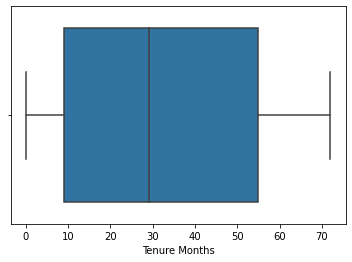

In [19]:
sns.boxplot(x =data['Tenure Months'])

<AxesSubplot:xlabel='Total Charges'>

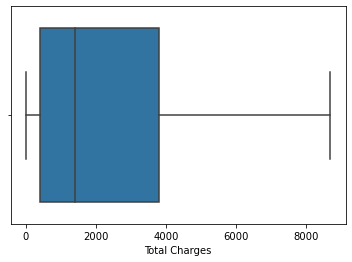

In [20]:
sns.boxplot(x =data['Total Charges'])

<AxesSubplot:xlabel='Monthly Charges'>

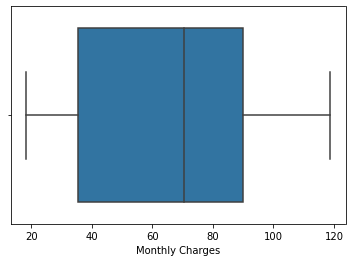

In [21]:
sns.boxplot(x =data['Monthly Charges'])

<AxesSubplot:xlabel='Churn Score'>

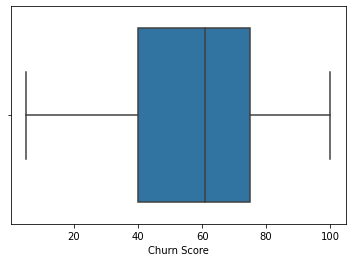

In [22]:
sns.boxplot(x =data['Churn Score'])

<AxesSubplot:xlabel='CLTV'>

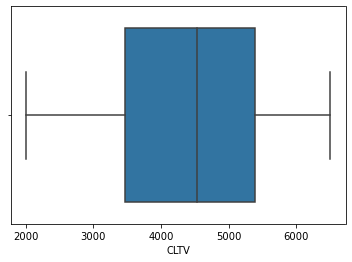

In [23]:
sns.boxplot(x =data['CLTV'])

Obviously, there is no outlier. Let's check whether 0 in 'Total Charges' makes sense or not.

### 8-2 Investigate 'Total Charges'

In [21]:
# Filter Total Charge 0
data.loc[(data['Total Charges'] == 0)]

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Score,CLTV
2234,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No,36,2578
2438,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No,68,5504
2568,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No,45,2048
2667,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No,48,4950
2856,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No,30,4740
4331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No,53,2019
4687,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No,49,2299
5104,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No,27,3763
5719,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No,69,4890
6772,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,No,Two year,No,Mailed check,73.35,0.0,No,44,2342


All the observation has 0 Tenure Months and 'No' in Churn Label. I think they are all new customer.

## 9. Save data

In [9]:
data.to_pickle('/Users/hansangjun/Desktop/Springboard/Capstone2/data/telco_data/AfterWrangling.pkl')

In [12]:
data.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Score,CLTV,Churn Reason
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,86,3239,Competitor made better offer
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,67,2701,Moved
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,86,5372,Moved
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,84,5003,Moved
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,89,5340,Competitor had better devices
